# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [4]:
data = pd.read_excel('E://Netology//AML//5._Кластеризация//homework//geo_comment.xlsx', sheet_name="Sheet1")

In [68]:
data.head(20)

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
5,5,37.558526,55.728758,-1,1,Установить зону развития по адресу: Новодевичи...
6,6,37.566431,55.731794,-1,1,Установить зону развития по адресу: Новодевичи...
7,7,37.558957,55.723399,-1,1,Прошу поменять зону сохранения нахождения объе...
8,8,37.558957,55.723399,-1,1,Прошу перевести из зоны сохранения в зону разв...
9,9,37.565767,55.734567,-1,1,Прошу внести технико-экономические показатели ...


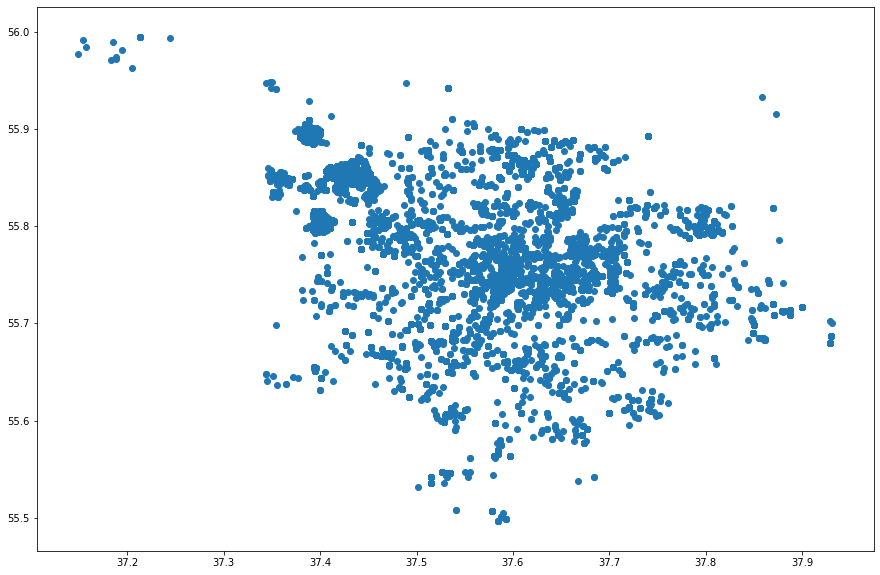

In [16]:
plt.rcParams['figure.figsize']=(15,10)
plt.scatter(data['x'], data['y'])

In [64]:
def f_kmean(X,num_cl):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    clf_kmeans = KMeans(n_clusters=num_cl)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(X['x'], X['y'],c=clusters_kmeans)

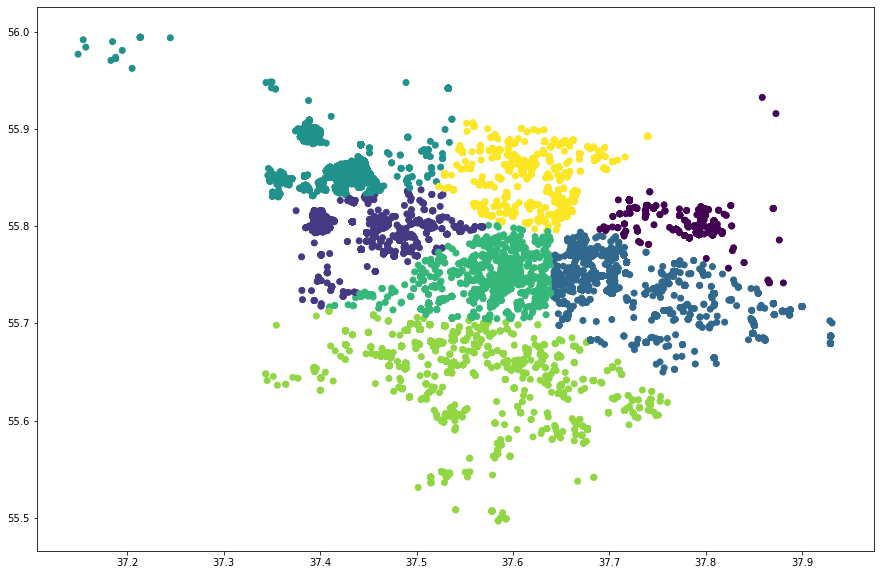

In [44]:
#Кластеризуем без учета голосов. 
X = data[['x','y']]
f_kmean(X,7)

In [52]:
def get_inertia(X):
    k_inertia = []
    ks = range(1,11)
    X_scaled = StandardScaler().fit_transform(X)
    for k in ks:
        clf_kmeans = KMeans(n_clusters=k)
        clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
        k_inertia.append(clf_kmeans.inertia_)
    #plt.plot(ks, k_inertia)
    #plt.plot(ks, k_inertia ,'ro')
    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    plt.plot(ks[1:-1], diff_r)

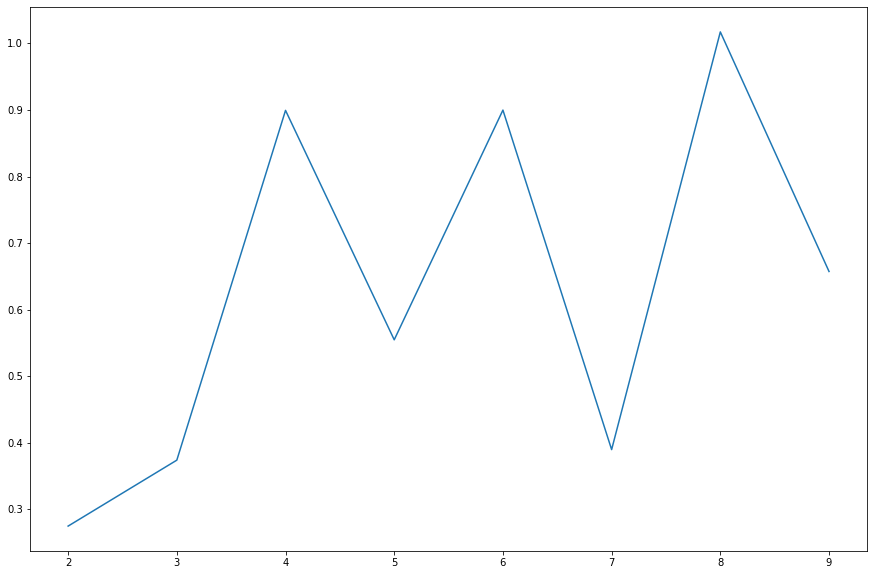

In [53]:
X = data[['x','y']]
get_inertia(X)

In [ ]:
# Получается, что 2кластера это оптимально.  Но 7 конечно интереснее ))

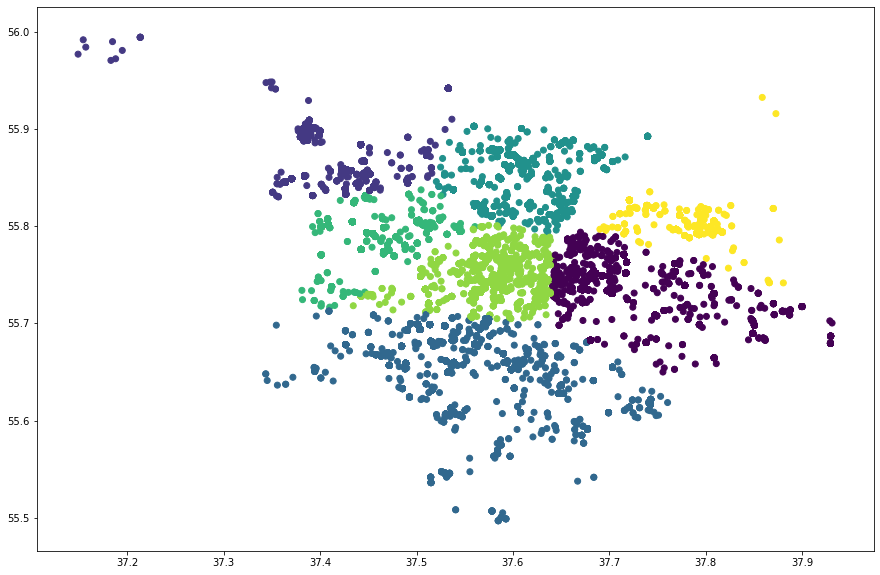

In [59]:
#Посмотрим на голосовавших против
X0 = data[data.comment_class == -1][['x','y']]

f_kmean(X0,5)

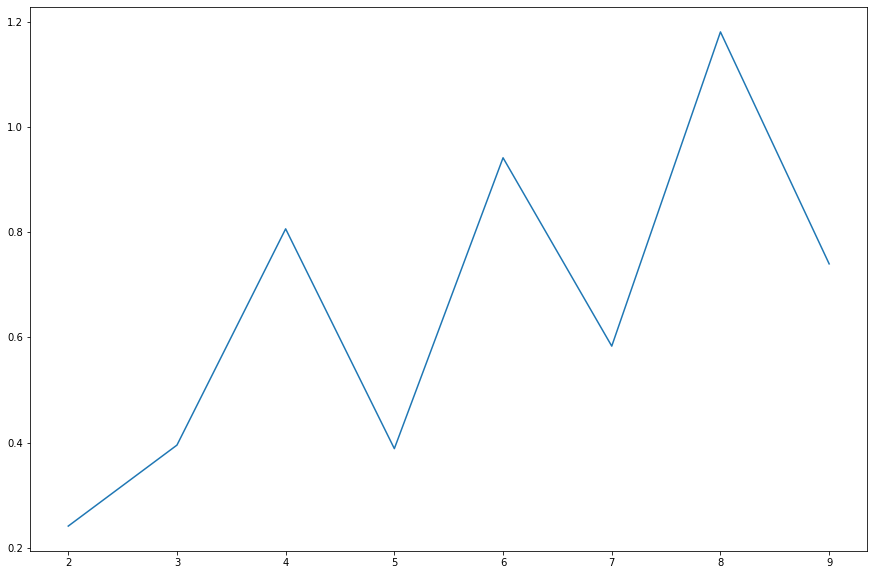

In [56]:
get_inertia(X0)

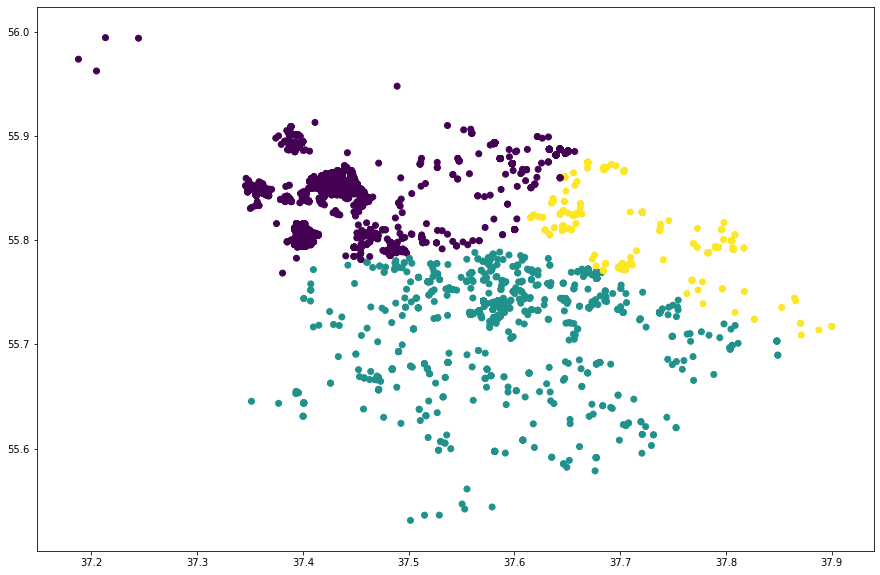

In [67]:
#Посмотрим на голосовавших против
X1 = data[data.comment_class == 1][['x','y']]

f_kmean(X1,3)

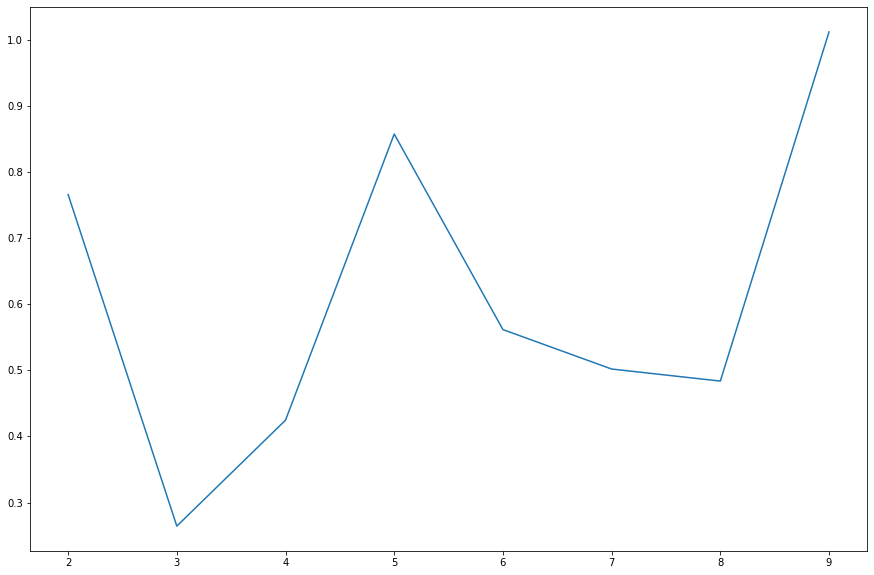

In [58]:
get_inertia(X1)

In [ ]:
#У голосовавших против явно 3 самое оптимальное число кластеров

In [61]:
#Теперь кластеризация с учетом голосов
X = data[['x','y','comment_class']]

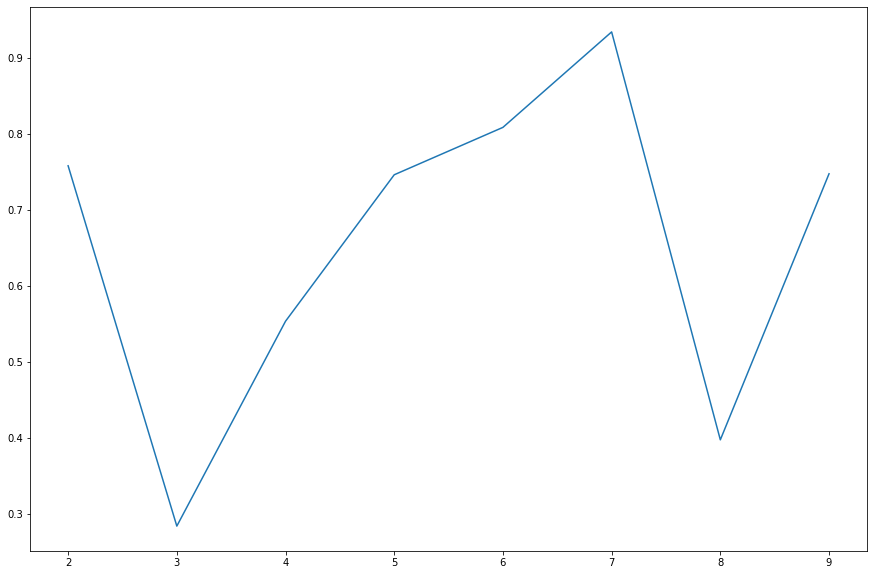

In [62]:
get_inertia(X)

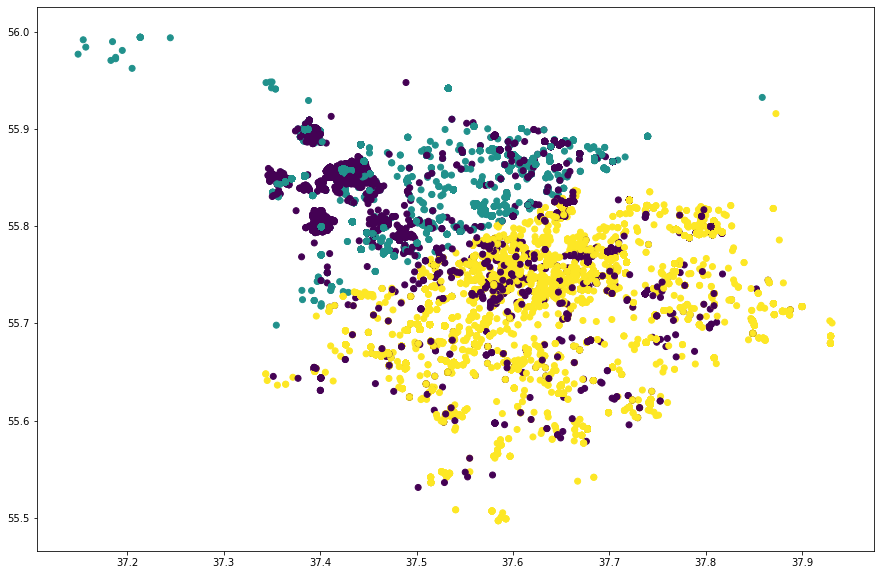

In [66]:
#Нарисуем по 3 кластерам
f_kmean(X,3)

In [24]:
# Посмотрим что дает dbscan
clusters =  DBSCAN().fit_predict(X_scaled)


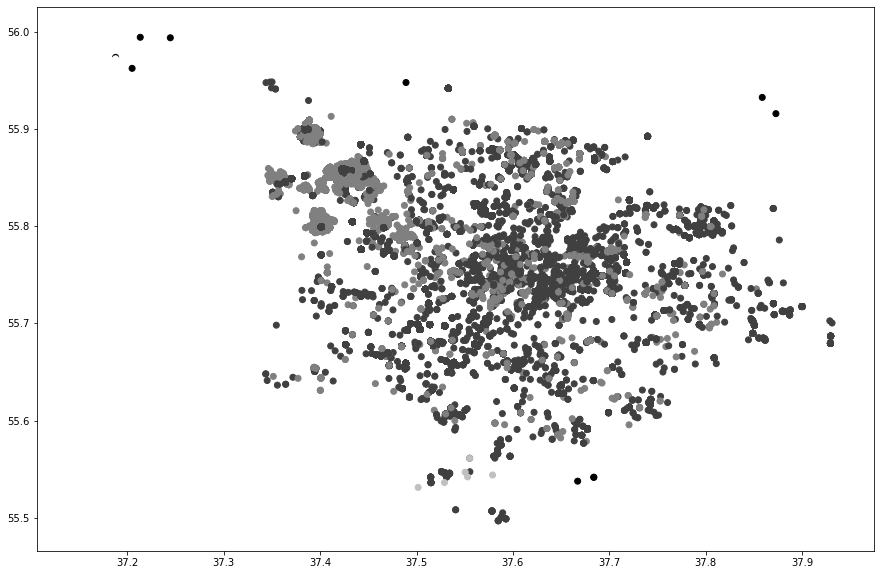

In [25]:
plt.rcParams['figure.figsize']=(15,10)
plt.scatter(data['x'], data['y'],c=clusters,cmap='gray')

In [36]:
#Метрики из мануала

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 10
Silhouette Coefficient: -0.011
